In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [21]:
def make_disks(inc=0):
    x,y,z = np.meshgrid(np.arange(-10,10, .1), np.arange(-10,10, .1), np.arange(-10,10, .1))
    hz = 1.
    hr = 5.
    mu_0 = 1.

    hz_thick = 2.5
    mu0_thick = .2
    hr_thick = 5.

    inc = np.radians(inc)

    cos_inc = np.cos(inc)
    sin_inc = np.sin(inc)
    
    yp = y 
    xp = cos_inc*x+sin_inc*z
    zp = -sin_inc*x + cos_inc*z

    Radius = (xp**2 + yp**2)**0.5
    fluxes = mu_0*np.exp(-1.*Radius/hr)*np.exp(-1.*np.abs(zp)/hz)
    fluxes_thick = mu0_thick*np.exp(-1.*Radius/hr_thick)*np.exp(-1.*np.abs(zp)/hz_thick)
    return fluxes, fluxes_thick

In [11]:
fluxes, fluxes_thick = make_disks()


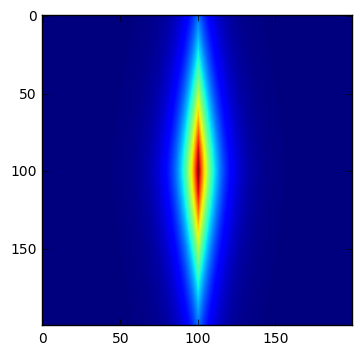

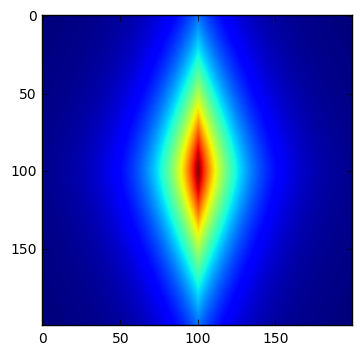

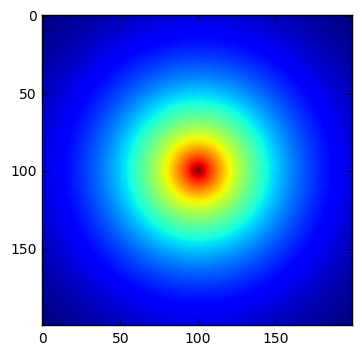

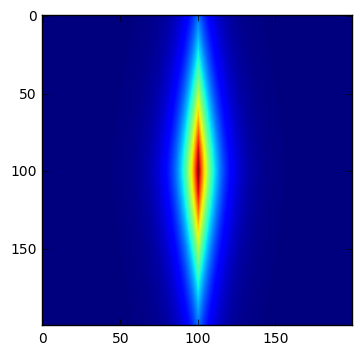

In [12]:
plt.imshow(np.sum(fluxes, axis=1))
plt.figure()
plt.imshow(np.sum(fluxes_thick, axis=1))

plt.figure()
plt.imshow(np.sum(fluxes, axis=2))
plt.figure()

plt.imshow(np.sum(fluxes, axis=0))

In [13]:
thin = np.sum(fluxes, axis=1)
thickd = np.sum(fluxes_thick, axis=1)
profile =  thin + thickd

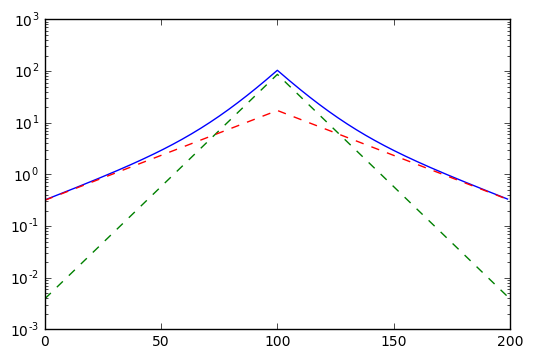

In [14]:
plt.semilogy(profile[100,:])
plt.plot(thin[100,:], '--')
plt.plot(thickd[100,:], '--')

In [15]:
pthin = thin[100,:]
pthick = thickd[100,:]
z_h = np.arange(pthin.size)
z_h = z_h-z_h.mean()

In [16]:
hz = 1.
z_flip = z_h[np.min(np.where((z_h > 0) & (pthick > pthin)))]/10.
z_flip/hz

2.75

In [22]:
incs = [0., 5., 10., 15., 20.]
flips = []
for inc in incs:
    fluxes, fluxes_thick = make_disks(inc=inc)
    thin = np.sum(fluxes, axis=1)
    thickd = np.sum(fluxes_thick, axis=1)
    profile =  thin + thickd
    pthin = thin[100,:]
    pthick = thickd[100,:]
    z_h = np.arange(pthin.size)
    z_h = z_h-z_h.mean()
    z_flip = z_h[np.min(np.where((z_h > 0) & (pthick > pthin)))]/10.
    flips.append(z_flip/hz)
    

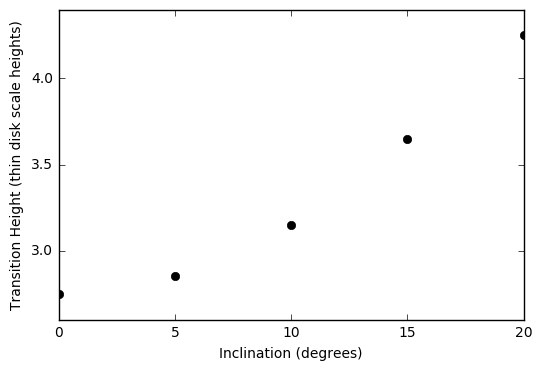

In [25]:
plt.plot(incs, flips, 'ko')
plt.xlabel('Inclination (degrees)')
plt.ylabel('Transition Height (thin disk scale heights)')